In [55]:
from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
cd ~/Desktop/workbench/dojo/comma10k/data

/Users/gautam/Desktop/workbench/dojo/comma10k/data


In [221]:
class Comma10K:
    
    def __init__(self, *, path, train):
        self.path = Path(path)
        with open(self.path / 'files_trainable') as f:
            mask_files = [m.strip() for m in f.readlines()
                          if (train and not m.strip().endswith('9.png')) or (not train and m.strip().endswith('9.png'))
                         ]
        self.mask_files = mask_files    
        self.classes = {
            'road': (0, (64, 32, 32)),
            'marking': (1, (255, 0, 0)),
            'undrivable': (2, (128, 128, 96)),
            'movable': (3, (0, 255, 102)),
            'ego': (4, (204, 0, 255)),
        }
        
    def __len__(self):
        return len(self.mask_files)
    
    def __getitem__(self, idx):
        mask_path = Path(mask_files[idx])
        img_path = self.path / Path('imgs') / mask_path.name
        
        # this is expensive
        rgb_mask = np.array(Image.open(mask_path))
        rgb_img = np.array(Image.open(img_path))

        canvas = -np.ones(rgb_mask.shape[:2], dtype=np.int8)
        for (cat_id, cat_rgb) in classes.values():
            cat_x, cat_y, _ = np.where(rgb_mask == cat_rgb)
            canvas[cat_x, cat_y] = cat_id
            
        return rgb_img, canvas

In [222]:
ds = Comma10K(path='.', train=False)

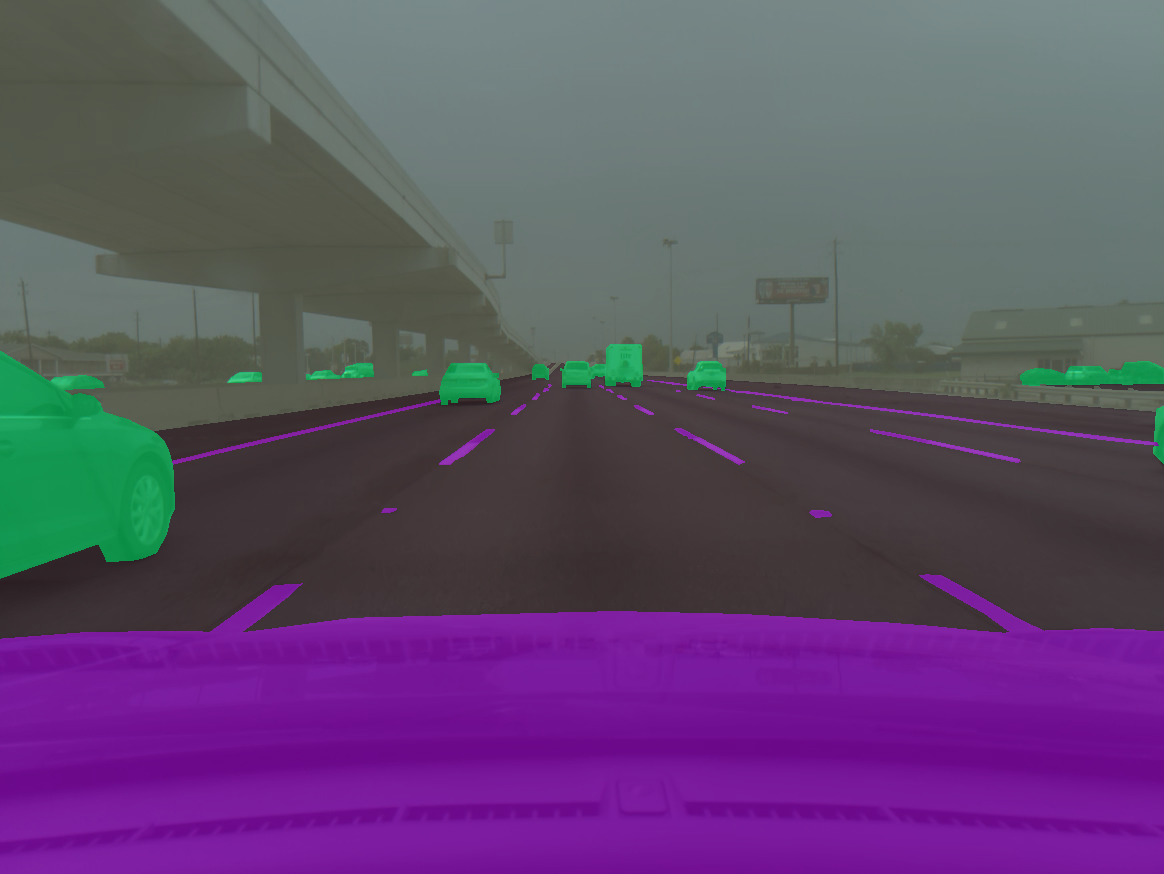

In [224]:
rgb_img, canvas = ds[513]

cmap = np.array([v[1] for v in ds.classes.values()], dtype=np.uint8)
camera = Image.fromarray(rgb_img)
rgb_canv = Image.fromarray(cmap[canvas]).convert("RGBA")
rgb_canv.putalpha(127)
camera.paste(rgb_canv, (0, 0), rgb_canv)
camera